In [15]:
%load_ext autoreload
%autoreload 2

from pxr import Usd, UsdGeom

usd_file = '/home/jorge/untitled.usdc'

stage = Usd.Stage.Open(usd_file)

/home/jorge/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/jorge/.local/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c104impl8GPUTrace13gpuTraceStateE
  warn(f"Failed to load image Python extension: {e}")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
for prim in stage.Traverse():
    print(prim.GetPath())

/root
/root/Camera
/root/Camera/Camera
/root/Armature
/root/Armature/Ch36
/root/Armature/Ch36/Mesh


In [17]:
frame_start = int(stage.GetStartTimeCode())
frame_end = int(stage.GetEndTimeCode())

frame = frame_start
xform_cache = UsdGeom.XformCache(time=frame)

In [ ]:
# find camera and mesh
for prim in stage.Traverse():
    if prim.IsA(UsdGeom.Mesh):
        mesh = UsdGeom.Mesh(prim)
    if prim.IsA(UsdGeom.Camera):
        camera = UsdGeom.Camera(prim)


(-0.8626451246440411,
 0.29331310614943507,
 -1.0229841202497483,
 0.6010499328374863)

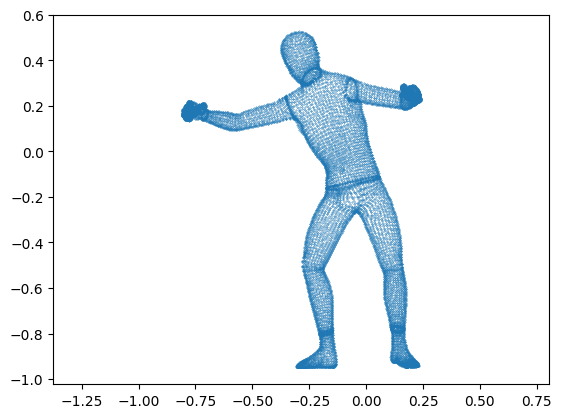

In [25]:
from matplotlib import pyplot as plt
from torch import Tensor

from scripts.view_animation_usd import apply_transform_homogeneous

m2w = xform_cache.GetLocalToWorldTransform(mesh.GetPrim())
m2w = Tensor(m2w).T

verts = mesh.GetPointsAttr().Get()
face_indices = mesh.GetFaceVertexIndicesAttr().Get()
face_count = mesh.GetFaceVertexCountsAttr().Get()

verts = Tensor(mesh.GetPointsAttr().Get(100))
transformed = apply_transform_homogeneous(verts, m2w)
plt.scatter(x=transformed[:, 0], y=transformed[:, 2], s=0.1)
plt.axis('equal')

In [ ]:
from scripts.view_animation_usd import decompose_transform_srt
from pytorch3d.renderer import FoVPerspectiveCameras

c2w = xform_cache.GetLocalToWorldTransform(camera.GetPrim())
c2w = Tensor(c2w).T

w2c = c2w.inverse()
t, _, r = decompose_transform_srt(w2c)

print(t.round(decimals=1))

cam = FoVPerspectiveCameras(R=r.unsqueeze(0), T=t.unsqueeze(0))
cam

tensor([ 0.2000,  0.0000, -3.9000])


FoVPerspectiveCameras()

In [ ]:
w2c = cam.get_world_to_view_transform()
w2c = w2c.get_matrix()[0].T

c2w = w2c.inverse()

t, _, r = decompose_transform_srt(c2w)
print(t.round(decimals=1))

tensor([-0.2000,  3.6000,  1.5000])
